# HW5 - Locke Patton

In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import scipy.special as special
import astropy.units as u
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Problem 1.

##### Using Python solve the following equation numerically and plot a(t) vs t. Note “.” represents the time derivative, where $H_o$ is the Hubble constant ($H_o = 70\, \frac{km}{s\,Mpc}$):

$$ H = \frac{\dot{a}}{a} = H_o \Big( \frac{\Omega_{m,o}}{a^3} + \frac{1-\Omega_{m,o}-\Omega_{\Lambda,o}}{a^2} + \Omega_{\Lambda,o} \Big)^\frac{1}{2} $$

$$ \dot{a} =\frac{da}{dt} =  H_o \Big( \frac{\Omega_{m,o}}{a} + 1-\Omega_{m,o}-\Omega_{\Lambda,o} + \Omega_{\Lambda,o}{{a^2}}\Big)^\frac{1}{2} $$

$$ dt = \frac{da}{H_o \Big( \frac{\Omega_{m,o}}{a} + 1-\Omega_{m,o}-\Omega_{\Lambda,o} + \Omega_{\Lambda,o}{{a^2}}\Big)^\frac{1}{2}} $$

$$ t - t_o = \int_{t_o}^t dt = \int_{a_o}^{a} \frac{da}{H_o \Big( \frac{\Omega_{m,o}}{a} + 1-\Omega_{m,o}-\Omega_{\Lambda,o} + \Omega_{\Lambda,o}{{a^2}}\Big)^\frac{1}{2}} $$

In [2]:
Ho_Current = (70 * u.km / (u.Mpc * u.s)).to(1/u.s)
print 'Hubble Constant:', Ho_Current,'.'

Hubble Constant: 2.26854550263e-18 1 / s .


Defining a class to hold universes.

In [195]:
Ho_Current = (70 * u.km / (u.Mpc * u.s)).to(1/u.s)

class universe:
    def __init__(self,omega_m,omega_l,omega_r):
        self.omega_m = omega_m
        self.omega_l = omega_l
        self.omega_r = omega_r
        self.h_0 = Ho_Current.value
    
    def find_params_for_given_a(self,a):
        
        def time(a,arguments):
            omega_m, omega_l, h0 = arguments
            t = np.sqrt(1/(h0**2.0 * (omega_m*(a**-1.0) + omega_l*(a**2.0) + (1.0-omega_m-omega_l))))
            return abs(t)
        def time_ng(a,arguments):
            omega_m, omega_l, h0 = arguments
            t = -np.sqrt(1/(h0**2.0 * (omega_m*(a**-1.0) + omega_l*(a**2.0) + (1.0-omega_m-omega_l))))
            return t

        t = []
        t_neg = []
        a_dot = []
        a_dot_neg = []
        
        for it_,a_ in enumerate(a):
            t_ = integrate.quad(time, 0, a_, args=([self.omega_m,self.omega_l,self.h_0]))[0]
            t_neg_ = integrate.quad(time_ng, 0, a_, args=([self.omega_m,self.omega_l,self.h_0]))[0]
            t.append(t_)
            t_neg.append(t_neg_)
            a_dot.append((a[it_]-a[it_-1])/(t[it_]-t[it_-1]))
            a_dot_neg.append((a[it_]-a[it_-1])/(t_neg[it_]-t_neg[it_-1]))
                
        a_dot_min = min(a_dot * np.sign(a_dot))

        t0 = integrate.quad(time, 0, 1, args=([self.omega_m,self.omega_l,self.h_0]))[0]
        t0_neg = integrate.quad(time_ng, 0, 1, args=([self.omega_m,self.omega_l,self.h_0]))[0]
        
        Htt0 = ([ time - t0  for time in t ] * u.s * Ho_Current).decompose()
        Htt0_neg =  ([ time - t0  for time in [2*max(t) + x for x in t_neg] ] * u.s * Ho_Current).decompose()
        
        self.a = a
        self.t = t
        self.t_neg = t_neg
        self.t0 = t0
        self.t0_neg = t0_neg
        self.Htt0 = Htt0
        self.Htt0_neg = Htt0_neg
        self.a_dot = a_dot
        self.a_dot_neg = a_dot_neg
        self.a_dot_min = a_dot_min

Given $\Omega_m = .3 $, this program tests different $\Omega_l$ between $1$ and $2$ to find loitering universe in $\Omega_l$ steps of $\frac{1}{100}$ by creating separate universes and finding which universes have $\dot{a}$ close to 0 (i.e. had a period of approxiate "flat" universe.

In [72]:
testverse1 = {}
testverse1['universe']=[]

Ho_Current = (70 * u.km / (u.Mpc * u.s)).to(1/u.s)
a = np.linspace(0.0001, 3, 500)
omega_l = np.linspace(1,2,100)

for it_,omega_l_it_ in enumerate(omega_l):
    print 'Universe ', str(it_+1), str(omega_l_it_),
    testverse1['universe'].append(universe(omega_m=.3,
                                               omega_l=omega_l_it_,
                                               omega_r=0)
    testverse1['universe'][it_].find_params_for_given_a(a)
    print testverse1['universe'][it_].a_dot_min

print 'complete'

Universe  1 1.0 1.6777169861e-18
Universe  2 1.0101010101 1.66657496214e-18
Universe  3 1.0202020202 1.65528203505e-18
Universe  4 1.0303030303 1.64388737954e-18
Universe  5 1.0404040404 1.63241318687e-18
Universe  6 1.05050505051 1.62083114377e-18
Universe  7 1.06060606061 1.60909096484e-18
Universe  8 1.07070707071 1.59726449426e-18
Universe  9 1.08080808081 1.58534980079e-18
Universe  10 1.09090909091 1.57328288563e-18
Universe  11 1.10101010101 1.56108166464e-18
Universe  12 1.11111111111 1.54878432452e-18
Universe  13 1.12121212121 1.53638855717e-18
Universe  14 1.13131313131 1.5238113679e-18
Universe  15 1.14141414141 1.51110507833e-18
Universe  16 1.15151515152 1.49829103484e-18
Universe  17 1.16161616162 1.48536644861e-18
Universe  18 1.17171717172 1.47224805502e-18
Universe  19 1.18181818182 1.45898461756e-18
Universe  20 1.19191919192 1.44559949064e-18
Universe  21 1.20202020202 1.432089262e-18
Universe  22 1.21212121212 1.41839163086e-18
Universe  23 1.22222222222 1.40450869

Finding $\Omega_\Lambda$ for universe with the smallest $\dot{a}$ for loitering universe.

In [255]:
a_dot_min = []
for uni_ in testverse1['universe']:
    a_dot_min.append(uni_.a_dot_min)

best_uni = a_dot_min.index(min(a_dot_min))
print a_dot_min[best_uni]
best_omega_l = testverse1['universe'][best_uni].omega_l
print 'Calculated BEST Omega Lambda for Loitering Universe:', best_omega_l

9.30948077654e-20
Calculated BEST Omega Lambda for Loitering Universe: 1.74747474747


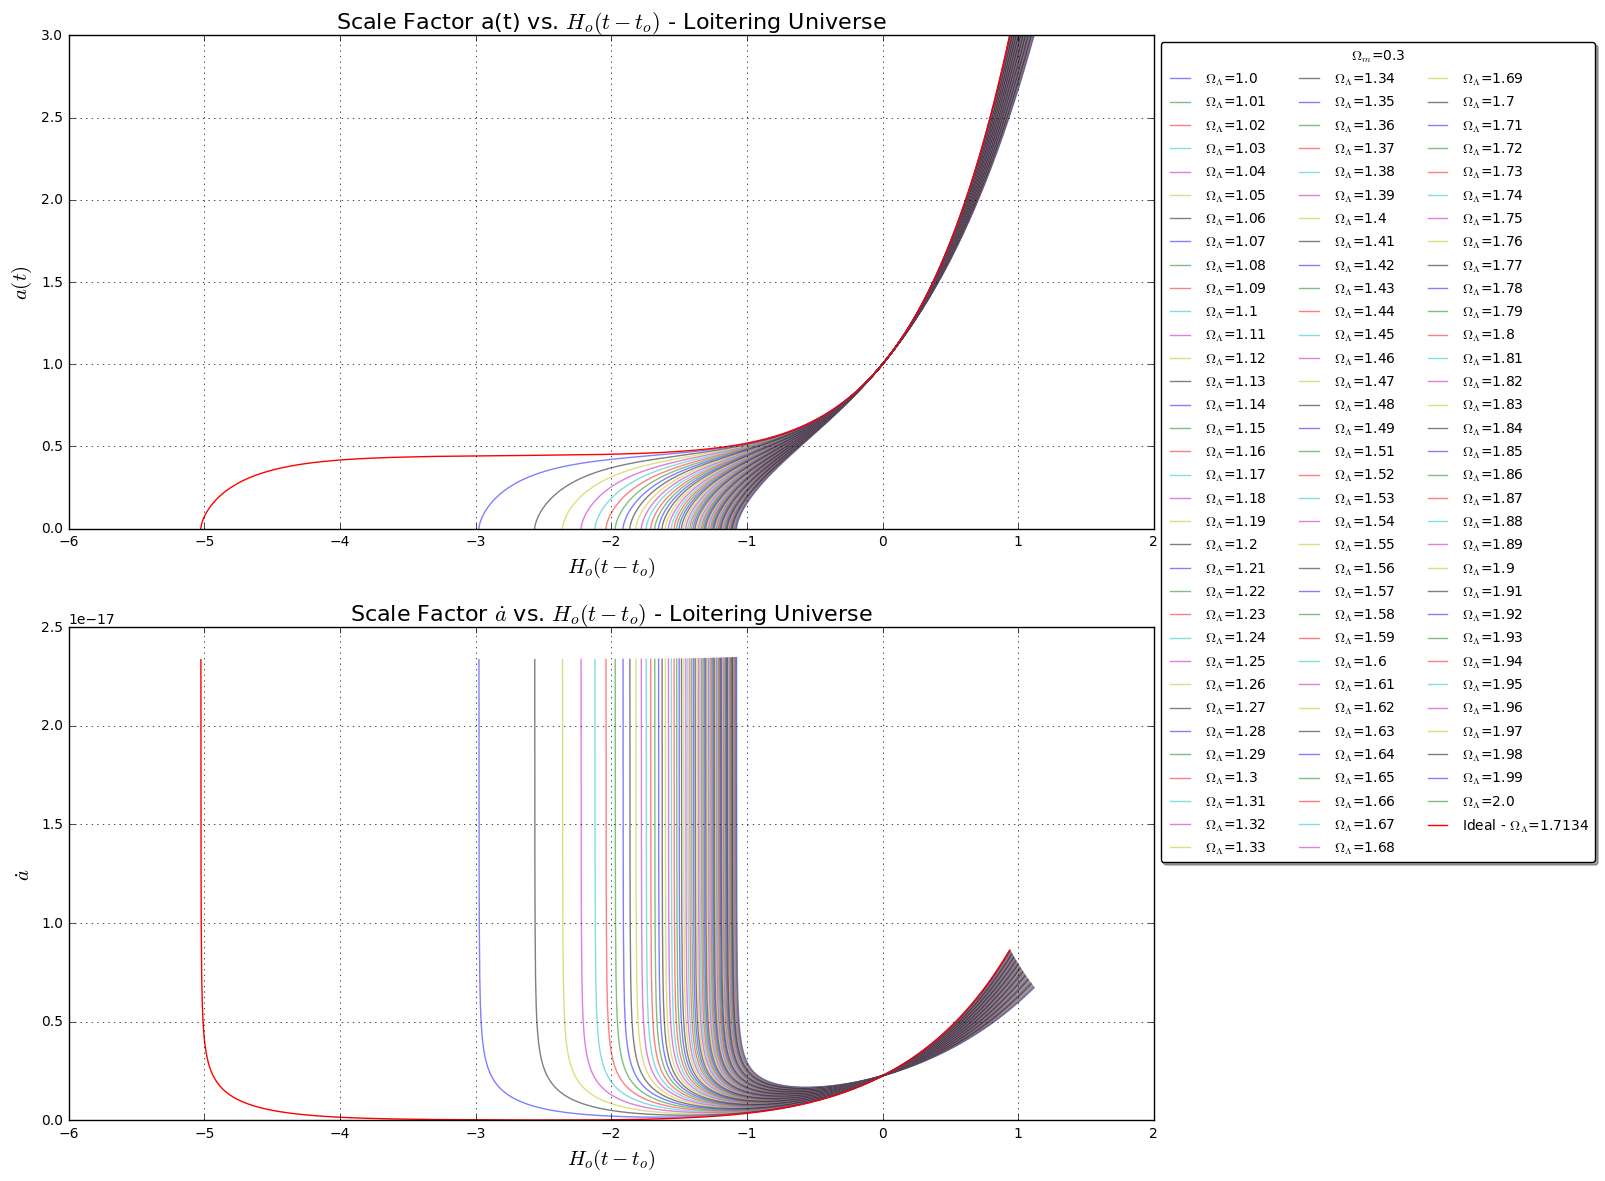

In [251]:
fig,ax = plt.subplots(2,1)
fig.set_size_inches(14,14)

alpha=0.5

ax[0].grid()
ax[1].grid()

for it_,universe in enumerate(testverse1['universe']):
    label_='$\Omega_\Lambda$='+ str(round(universe.omega_l,2))
    ax[0].plot(universe.Htt0,universe.a,    marker='',linestyle='-',alpha=alpha,label=label_);
    ax[1].plot(universe.Htt0,universe.a_dot,marker='',linestyle='-',alpha=alpha,label=label_);

alpha=1

label_='Ideal - $\Omega_\Lambda$='+ str(Uni1.omega_l)
ax[0].plot(Uni1.Htt0,Uni1.a,    marker='',linestyle='-',alpha=alpha,label=label_);
ax[1].plot(Uni1.Htt0,Uni1.a_dot,marker='',linestyle='-',alpha=alpha,label=label_);

ax[0].set_title('Scale Factor a(t) vs. $H_o(t - t_o)$ - Loitering Universe',fontsize=16);
ax[1].set_title('Scale Factor $\dot{a}$ vs. $H_o(t - t_o)$ - Loitering Universe',fontsize=16);
ax[0].set_xlabel('$H_o(t - t_o)$',fontsize=15);
ax[1].set_xlabel('$H_o(t - t_o)$',fontsize=15);
ax[0].set_ylabel('$a(t)$',fontsize=15);
ax[1].set_ylabel('$\dot{a}$',fontsize=15);

ax[0].legend(fontsize=10, ncol=int(len(testverse1['universe'])/20)-2, shadow=True, title='$\Omega_m$='+ str(round(universe.omega_m,2)),
             fancybox=True, loc="upper left", bbox_to_anchor=(1,1));

To calculate $t$ from $a(t)$ for our specific universes:

In [196]:
Uni1 = universe(omega_m=.3,
                omega_l=1.7134,
                omega_r=0)

Uni2 = universe(omega_m=.3,
                omega_l=-0.3,
                omega_r=0)

a = np.linspace(0.0001, 3, 500)
t = Uni1.find_params_for_given_a(a)
t2 = Uni2.find_params_for_given_a(a)

To plot our specific universes with $\Omega_m=.3$  &  $\Omega_\Lambda=1.7134$ for the loitering universe and  $\Omega_m=.3$  &  $\Omega_\Lambda = -0.3$ for the big crunch. Plotting both $a(t)$ and $\dot{a}$ vs. $H_o(t-t_o)$.

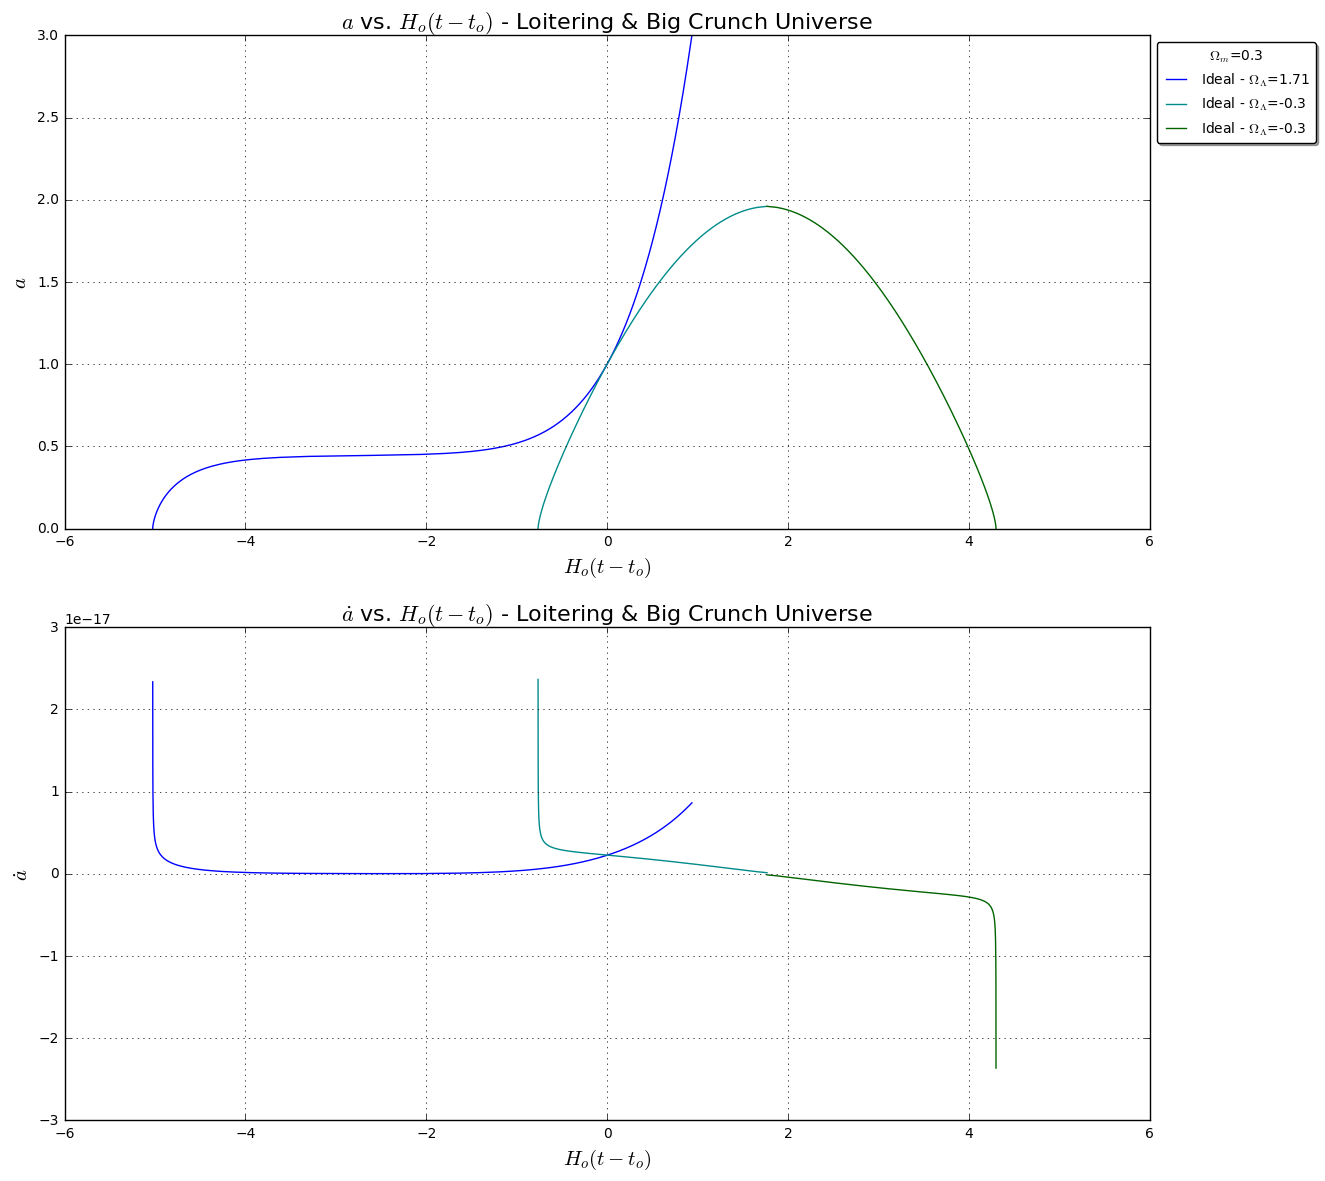

In [231]:
fig,ax = plt.subplots(2,1)
fig.set_size_inches(14,14)

alpha=1

label_='Ideal - $\Omega_\Lambda$='+ str(round(Uni1.omega_l,2))
ax[0].plot(Uni1.Htt0,     Uni1.a,        marker='',linestyle='-',alpha=alpha,label=label_,c='b');
ax[1].plot(Uni1.Htt0,     Uni1.a_dot,    marker='',linestyle='-',alpha=alpha,label=label_,c='b');    

label_='Ideal - $\Omega_\Lambda$='+ str(round(Uni2.omega_l,2))
ax[0].plot(Uni2.Htt0,     Uni2.a,        marker='',linestyle='-',alpha=alpha,label=label_,c='darkcyan');
ax[0].plot(Uni2.Htt0_neg, Uni2.a,        marker='',linestyle='-',alpha=alpha,label=label_,c='darkgreen');
ax[1].plot(Uni2.Htt0,     Uni2.a_dot,    marker='',linestyle='-',alpha=alpha,label=label_,c='darkcyan');    
ax[1].plot(Uni2.Htt0_neg, Uni2.a_dot_neg,marker='',linestyle='-',alpha=alpha,label=label_,c='darkgreen');    

ax[0].set_title('$a$ vs. $H_o(t - t_o)$ - Loitering & Big Crunch Universe',fontsize=16);
ax[1].set_title('$\dot{a}$ vs. $H_o(t - t_o)$ - Loitering & Big Crunch Universe',fontsize=16);
ax[0].set_xlabel('$H_o(t - t_o)$',fontsize=15);
ax[1].set_xlabel('$H_o(t - t_o)$',fontsize=15);
ax[0].set_ylabel('$a$',fontsize=15);
ax[1].set_ylabel('$\dot{a}$',fontsize=15);
ax[0].grid()
ax[1].grid()

ax[0].legend(fontsize=10, ncol=1, shadow=True, title='$\Omega_m$='+ str(round(Uni1.omega_m,2)),
             fancybox=True, loc="upper left", bbox_to_anchor=(1,1));

## Problem 2.

##### If a cluster of galaxies has a set of gravitational arcs (e.g. Einstein rings) we can use these arcs to calculate the mass internal to the inscribed circle. If we assume an isothermal sphere show that the velocity dispersion of the cluster is related to the angle of the arc in the image by
$$ \sigma_v = 10^3 km s^{-1} \Big(\frac{\theta}{28''}\frac{D_S}{D_{LS}}\Big)^{\frac{1}{2}}$$
An isothermal sphere has a density profile of $\rho(r) = \frac{\sigma_v^2}{2\pi G r^2}$.

With an isothermal sphere density profile and assuming a total volume of $ V = \frac{4}{3}\pi r^3$, we can find the total mass, M:

$$\rho(r) = \frac{\sigma_v^2}{2\pi G r^2}$$

$$M = \rho(r) V = \frac{\sigma_v^2}{2\pi G r^2} \frac{4}{3}\pi r^3$$

$$M = \frac{2\sigma_v^2  r}{3 G}$$

Similarly, since $ \theta_E = \sqrt \frac{4 G M D_{d\,s}}{D_d D_s c^2} $, we can find the total mass, M, again:

$$ M  = \frac{\theta_E^2 D_d D_s c^2} {4 G D_{d\,s} } $$

Setting these two masses equal to each other, we see:

$$M = \frac{2\sigma_v^2  r}{3 G} = \frac{\theta_E^2 D_d D_s c^2} {4 G D_{d\,s} } $$

Solving for $\sigma_v^2$:

$$\sigma_v^2 = \frac{3 \theta_E^2 D_d D_s c^2} {8 D_{d\,s} r} $$

For small $\theta$, we can apply the small angle approximation at the deflector and see  $\theta_E = \frac{r}{D_d}$, which, when plugged in once, results in:

$$\sigma_v^2 = \frac{3 \frac{r}{D_d} \theta_E D_d D_s c^2} {8 D_{d\,s} r} = \frac{3 \theta_E D_s c^2} {8 D_{d\,s}} = \frac{3 c^2} {8 } \frac{\theta_E D_s}{D_{d\,s}}$$

$$\sigma_v =  c \Big(\frac{3} {8 } \frac{\theta_E D_s}{D_{d\,s}} \Big)^{\frac{1}{2}}$$

Since 1 radian equals $ 206265 ''$:


$$\sigma_v =  300000\, km s^{-1} \, \Big(\frac{3\theta_E } {8 \, 206265 ''} \frac{D_s}{D_{d\,s}} \Big)^{\frac{1}{2}}$$

$$ \sigma_v = 10^4 km s^{-1} \Big(\frac{\theta_E}{24.72''}\frac{D_S}{D_{LS}}\Big)^{\frac{1}{2}}$$
Or...
$$ \sigma_v = 10^3 km s^{-1} \Big(\frac{\theta_E}{28''}\frac{D_S}{D_{LS}}\Big)^{\frac{1}{2}}$$

In [250]:
c = 3e8 *u.m/u.s
rad = 1 * u.rad
print c.to(u.km/u.s)
print rad.to(u.arcsec)
print 1/(c.to(u.km/u.s) * ( 3 / (8 * rad.to(u.arcsec)))**.5 / 10**3)

300000.0 km / s
206264.806247 arcsec
2.47215489295 arcsec(1/2) s / km
